In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 1

In [2]:
from math import gcd

In [3]:
N = 15

In [4]:
m = 7

In [5]:
if gcd(m,N) != 1:
  print("Problem solved")
else:
  print("Quatum Perior Search")

Quatum Perior Search


**Step 2**: Use a quantum computer to determine the period of f(x) = m^x mod(N)

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [7]:
# initialize quantum registers
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

Apply hadamard gates on each qubit of the second register and  create oracle


In [8]:
# function to build the oracle
f = [(m**i%N) for i in range(2**4)]
f

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

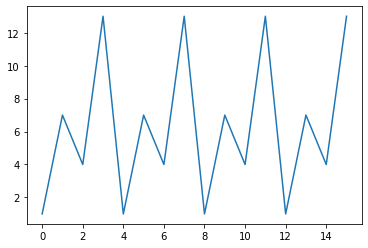

In [10]:
 x = np.arange(0,16,1)
 plt.plot(x,f)

In [11]:
for i in range(2**4):
  print(f"|{f[i]}> |{i}>")


|1> |0>
|7> |1>
|4> |2>
|13> |3>
|1> |4>
|7> |5>
|4> |6>
|13> |7>
|1> |8>
|7> |9>
|4> |10>
|13> |11>
|1> |12>
|7> |13>
|4> |14>
|13> |15>


Measure the quantum state

In [12]:
from random import choice

In [13]:
measurement = choice(f)
measurement

13

In [14]:
# create amplitudes for the states entangled with the measurement state
amplitudes = list(np.zeros(16).astype(int))
for i in range(2**4):
  if(f[i] == measurement):
    print(f"{i} = |{bin(i)[2:].zfill(4)}>")
    amplitudes[i] = 0.5

3 = |0011>
7 = |0111>
11 = |1011>
15 = |1111>


In [15]:
amplitudes

[0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5]

In [16]:
# initialize the amplitudes into the quantum circuit
qc.initialize(amplitudes,[q[0],q[1],q[2],q[3]])

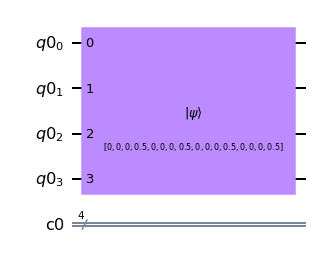

In [17]:
qc.draw("mpl")

In [18]:
# applyan inverse quantum fourier transformation in this circuit
from qiskit.circuit.library import QFT

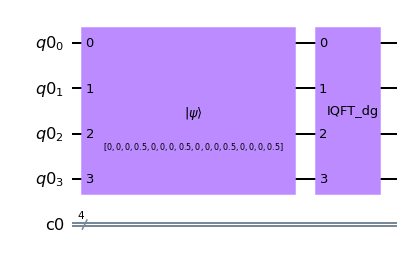

In [19]:
int_qft = QFT(4,inverse = True)
qc = qc.compose(int_qft)
qc.draw("mpl")

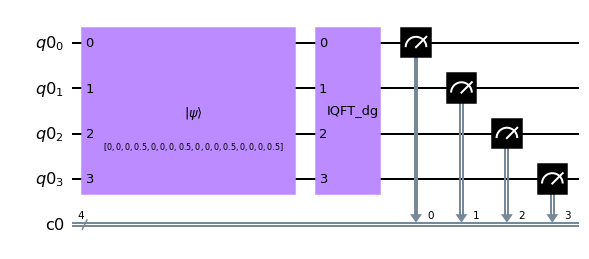

In [20]:
# measure the quantum state of the circuit 
for i in range(4):
  qc.measure(q[i],c[i])
qc.draw("mpl")

In [21]:
# ideal quantum computing simulation
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1000': 241, '0100': 260, '0000': 251, '1100': 272}


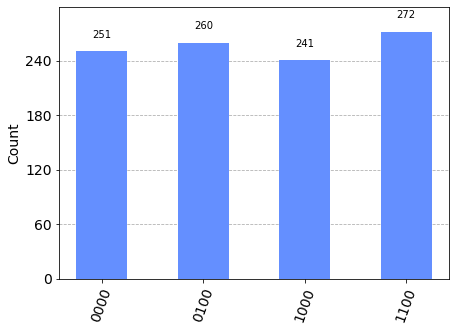

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [28]:
def result(counts = counts):
  results = [int(key,2) for key in counts.keys()]
  return results

In [30]:
result(counts)

[8, 4, 0, 12]

In [34]:
# solve the equation 
a = 2**4/result(counts)[1]

In [35]:
a

4.0

In [36]:
# calculate the factorized primes 
p = a +1
q = a -1
print(p,q)

5.0 3.0
